In [21]:
# imports
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



### Load the dataset from the file Ecommerce.csv and get rid of non-numerical columns of the dataset

In [22]:
df = pd.read_csv('Ecommerce.csv')
columns_to_drop = ['Email', 'Address', 'Avatar']
df = df.drop(columns_to_drop, axis = 1)

### Use Yearly Amount Spent as target variable. Plot the relationship of each of the numerical features with the target variable

['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


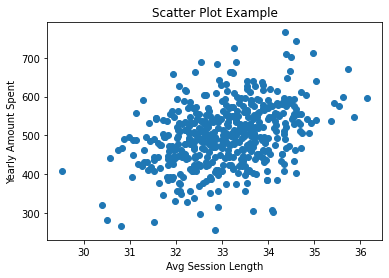

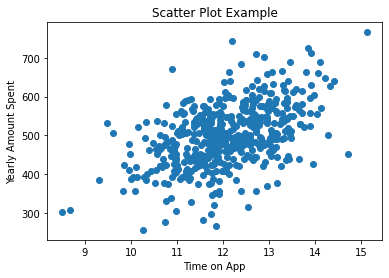

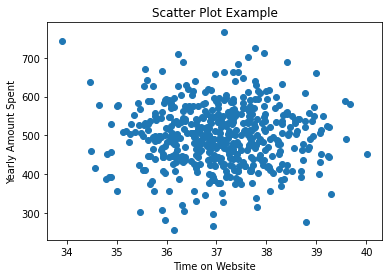

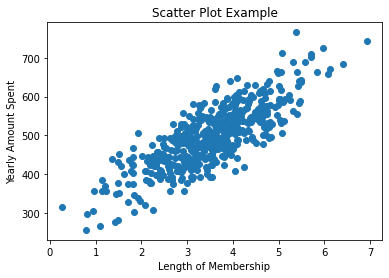

In [23]:

columns = []
for item in df:
    columns.append(item)
print(columns)
for i in range(len(columns)- 1):
    plt.scatter(df[columns[i]],df['Yearly Amount Spent'])
    plt.title('Scatter Plot Example')
    plt.xlabel(columns[i])
    plt.ylabel('Yearly Amount Spent')
    plt.show()

### Leave only one feature that has a linear relationship with the target variable.

In [24]:
for i in range(len(columns) - 1):
    if columns[i] != 'Length of Membership':
        df = df.drop(columns[i], axis=1)

### Divide the dataset into training and test sets with the ratio 80:20.

In [25]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["Length of Membership"],df["Yearly Amount Spent"], test_size = 0.2,shuffle = True,random_state = 42)



### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

In [26]:
def fit_1d_linear_regression(X_train, y_train):
    """ 
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    X = np.c_[np.ones(np.array(X_train).shape[0]),np.array(X_train)]
    beta =  np.linalg.inv(X.T @ X) @ X.T @ y_train
    return beta

In [27]:
# call
beta_alpha = fit_1d_linear_regression(x_train,y_train)
beta_alpha

array([271.3521128 ,  64.64010065])

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train)
intercept = model.intercept_
coefficients = model.coef_
check_beta = [intercept] + coefficients.tolist()
check_beta

[271.3521128033932, 64.64010065386708]

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [29]:
def plot_fitted_line(b0: float, b1: float, x, y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.scatter(x, y, label='Data')

    y_pred = b0 + b1 * x
    plt.plot(x, y_pred, color='red', label=f'Linear Regression: y = {b0:.2f} + {b1:.2f}x')

    plt.title('Grafic of Linear Regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.savefig('YOURNAME.png')
    plt.show()


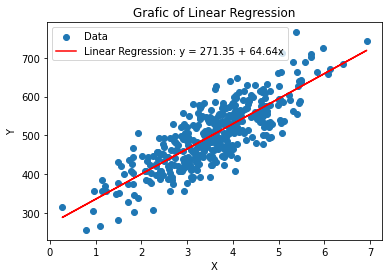

In [30]:
# call
plot_fitted_line(beta_alpha[0],beta_alpha[1],x_train,y_train)

In [31]:
def fit_1d_ridge_regression(X_train, y_train, k):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    X = np.c_[np.ones(np.array(x_train).shape[0]),np.array(x_train)]
    beta =  np.linalg.inv(X.T @ X + k * np.eye((X.T @ X).shape[0])) @ X.T @ np.array(y_train)
    return beta


In [32]:
# call
beta = fit_1d_ridge_regression(x_train,y_train, 0.001)
beta

array([271.34378705,  64.64224394])

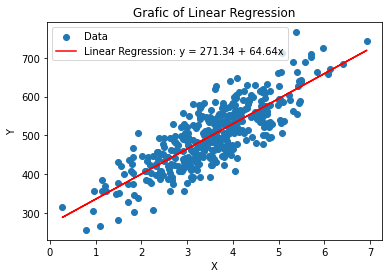

In [33]:
# plot call
plot_fitted_line(beta[0],beta[1],x_train, y_train)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
def mae(y, y_pred):
    errors = abs(y - y_pred)
    mae_value = np.mean(errors)
    return mae_value


In [36]:
def mse(y, y_pred):
    squared_errors = (y - y_pred) ** 2
    mse_value = np.mean(squared_errors)
    return mse_value


In [37]:
def rmse(y, y_pred):
    squared_errors = (y - y_pred) ** 2
    mse_value = np.mean(squared_errors)
    return mse_value ** 0.5



In [38]:
def r_squared(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = np.sum((y - mean_y) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [39]:
y_pred = beta_alpha[0] + beta_alpha[1] * x_test
y_pred_sk = model.predict(x_test.values.reshape(-1, 1))

columns = ['Metric', 'Custom', 'sklearn']
rows = [
    ['MAE', mae(y_test, y_pred), mean_absolute_error(y_test, y_pred_sk)],
    ['MSE', mse(y_test, y_pred), mean_squared_error(y_test, y_pred_sk)],
    ['RMSE', rmse(y_test, y_pred), mean_squared_error(y_test, y_pred_sk)**(1/2)],
    ['R2 score', r_squared(y_test, y_pred), r2_score(y_test, y_pred_sk)]
]

pd.DataFrame(rows, columns = columns)

,Metric,Custom,sklearn
0,MAE,37.836234,37.836234
1,MSE,2162.111633,2162.111633
2,RMSE,46.498512,46.498512
3,R2 score,0.563362,0.563362


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [41]:
df = pd.read_csv('Ecommerce.csv')
columns_to_drop = ['Email', 'Address', 'Avatar']
df = df.drop(columns=columns_to_drop, axis=1)


X = df.drop('Yearly Amount Spent', axis=1) 
y = df['Yearly Amount Spent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


total_beta_alpha = fit_1d_linear_regression(X_train, y_train)
y_pred_custom = np.dot(np.c_[np.ones(X_test.shape[0]), X_test], total_beta_alpha)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sk = model.predict(X_test)


intercept = model.intercept_
coefficients = model.coef_
check_beta = [intercept] + coefficients.tolist()
check_beta

column = ['Metric', 'Custom', 'sklearn']
rows = [
    ['MAE', mae(y_test, y_pred_custom), mean_absolute_error(y_test, y_pred_sk)],
    ['MSE', mse(y_test, y_pred_custom), mean_squared_error(y_test, y_pred_sk)],
    ['RMSE', rmse(y_test, y_pred_custom), mean_squared_error(y_test, y_pred_sk)**(1/2)],
    ['R2 score', r_squared(y_test, y_pred_custom), r2_score(y_test, y_pred_sk)]
]

print(pd.DataFrame(rows, columns=column))


     Metric      Custom     sklearn
0       MAE    8.558442    8.558442
1       MSE  109.863741  109.863741
2      RMSE   10.481591   10.481591
3  R2 score    0.977813    0.977813
